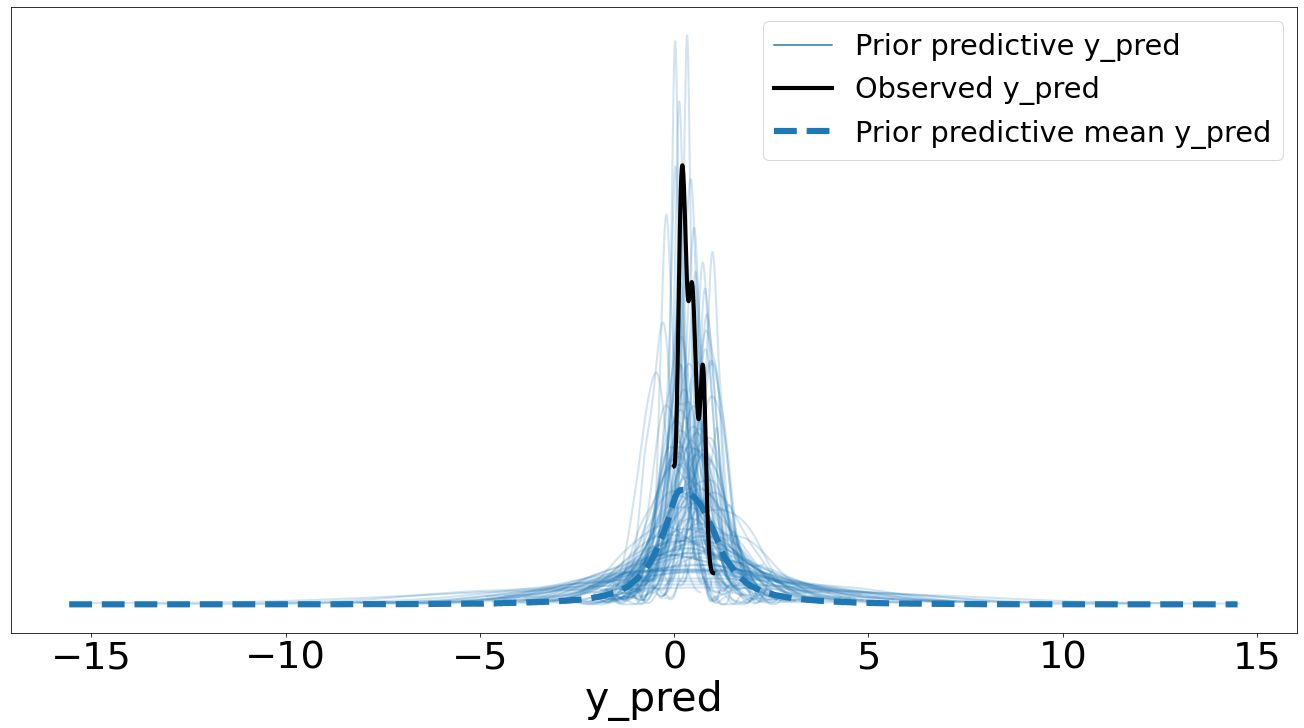

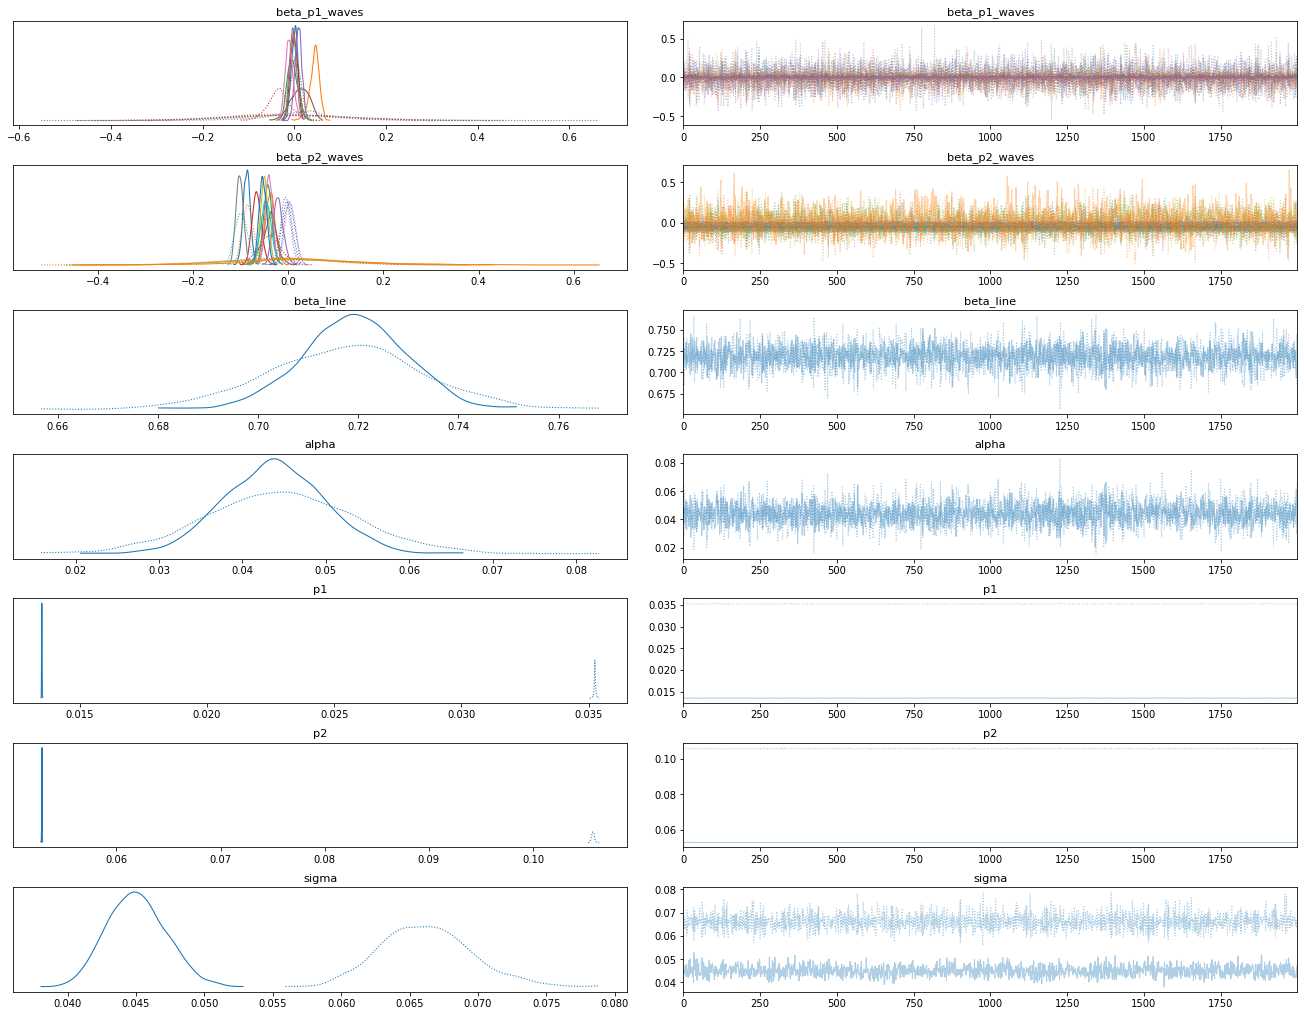

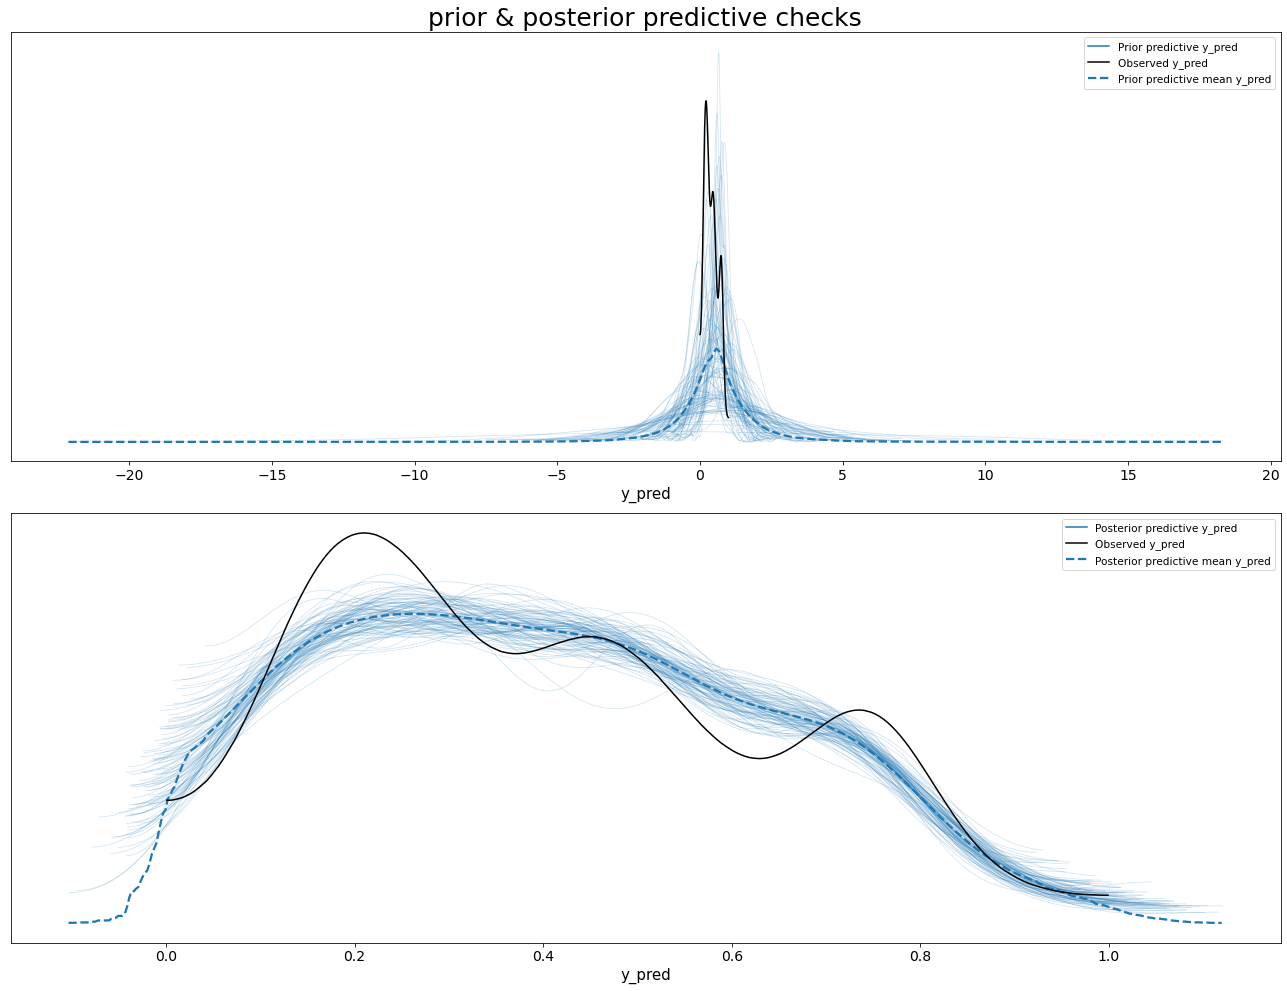

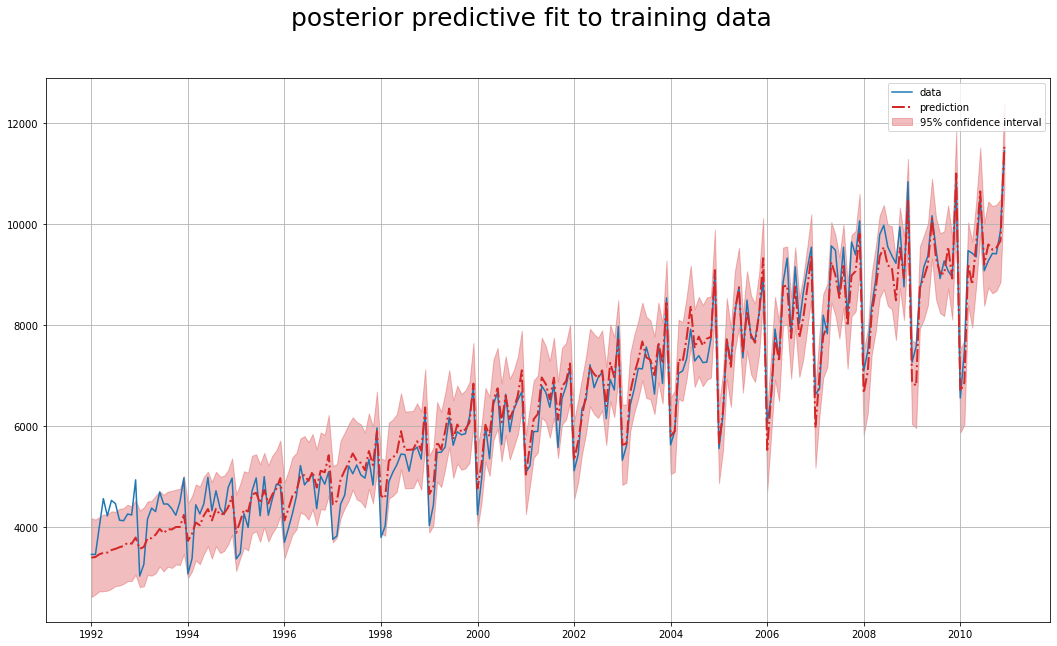

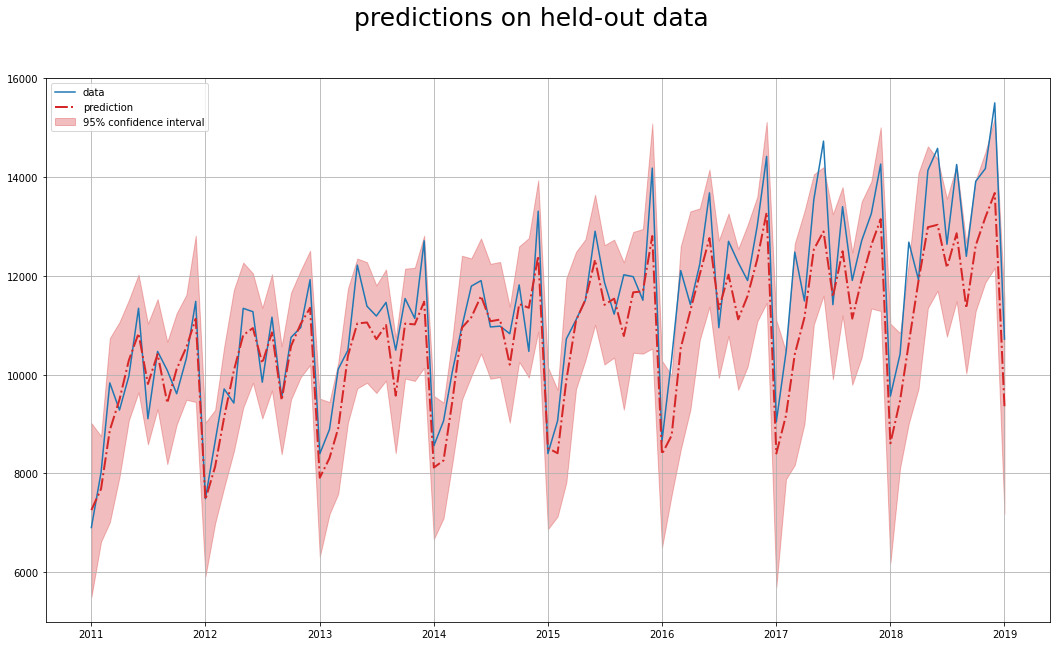

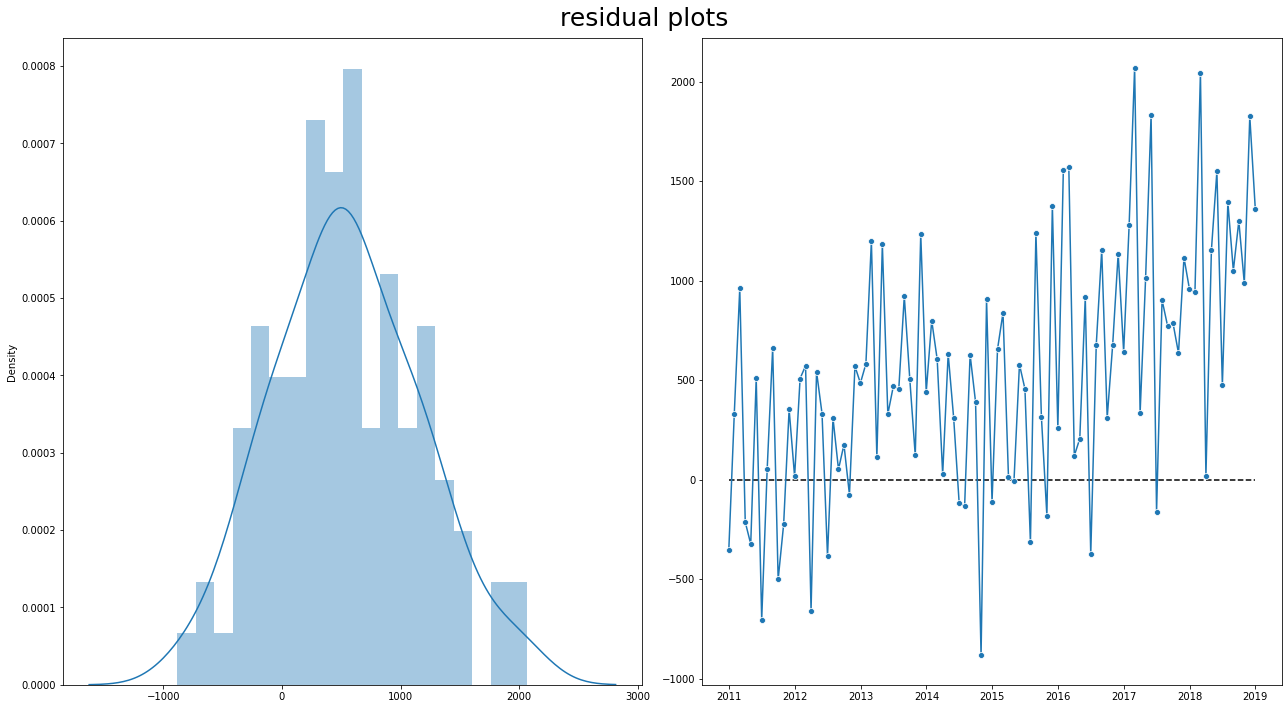

In [2]:
## import packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 
import pandas as pd 
from covid19dh import covid19
from datetime import date
from Get_covid_data import get_data
import pymc3 as pm
import pandas as pd 
import numpy as np 
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import os 
import theano
import theano.tensor as tt 
import random
import fns as f
import PyCipio as pc 
import pickle

## load data
d = pd.read_csv("../data/archive/Alcohol_Sales.csv")

## weird quick of the format - have to set it to pd.DateTime
d["DATE"] = pd.to_datetime(d["DATE"])

## instantiate class
sim = pc.PyCipio(d, time = "DATE", values = "S4248SM144NCEN", split = 0.7)

## load idata into the class
sim.load_idata("../models/m_ex2_4-4M_12-6M")

## compile model
sim.fit(p1 = (4, 4), p2 = (12, 6), p1_mode = "multiplicative", p2_mode = "multiplicative")

##### plot trace #####
sim.plot_trace(path = "../plots/ex2_plot_trace")

### plot pp ###
sim.plot_pp(path = "../plots/ex2_plot_pp")

### plot training ###
sim.plot_fit_idx(path = "../plots/ex2_plot_fit_idx")

### plot prediction ###
sim.plot_predict_idx(path = "../plots/ex2_plot_predict_idx")

### get errors ###
sim.get_errors(path = "../plots/ex2_get_errors")

### plot residuals ###
sim.plot_residuals(path = "../plots/ex2_residual_plots")
#sim.save_idata("../models/m_ex2_4-4M_12-6M")